# **Fashion MNIST Classification**


### Problem Statement
 
### Classifying images of fashion items into 10 different categories using a convolutional neural network (CNN).

### Dataset Information:
 - **Training samples**: 60,000 grayscale images (28x28 pixels)
 - **Testing samples**: 10,000 grayscale images (28x28 pixels)
 - **Classes**: 10 fashion categories
   - 0: T-shirt/top
   - 1: Trouser
   - 2: Pullover
   - 3: Dress
   - 4: Coat
   - 5: Sandal
   - 6: Shirt
   - 7: Sneaker
   - 8: Bag
   - 9: Ankle boot
 
### Each pixel value ranges from 0 to 255 (grayscale intensity)

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set consistent plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

### Data Loading and Initial Exploration

In [13]:
# Load data from CSV files
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')
    
# Print dataset information
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)
print("\nTraining data sample:")
display(train_df.head(3))

Training data shape: (60000, 785)
Testing data shape: (10000, 785)

Training data sample:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


### Data Visualization

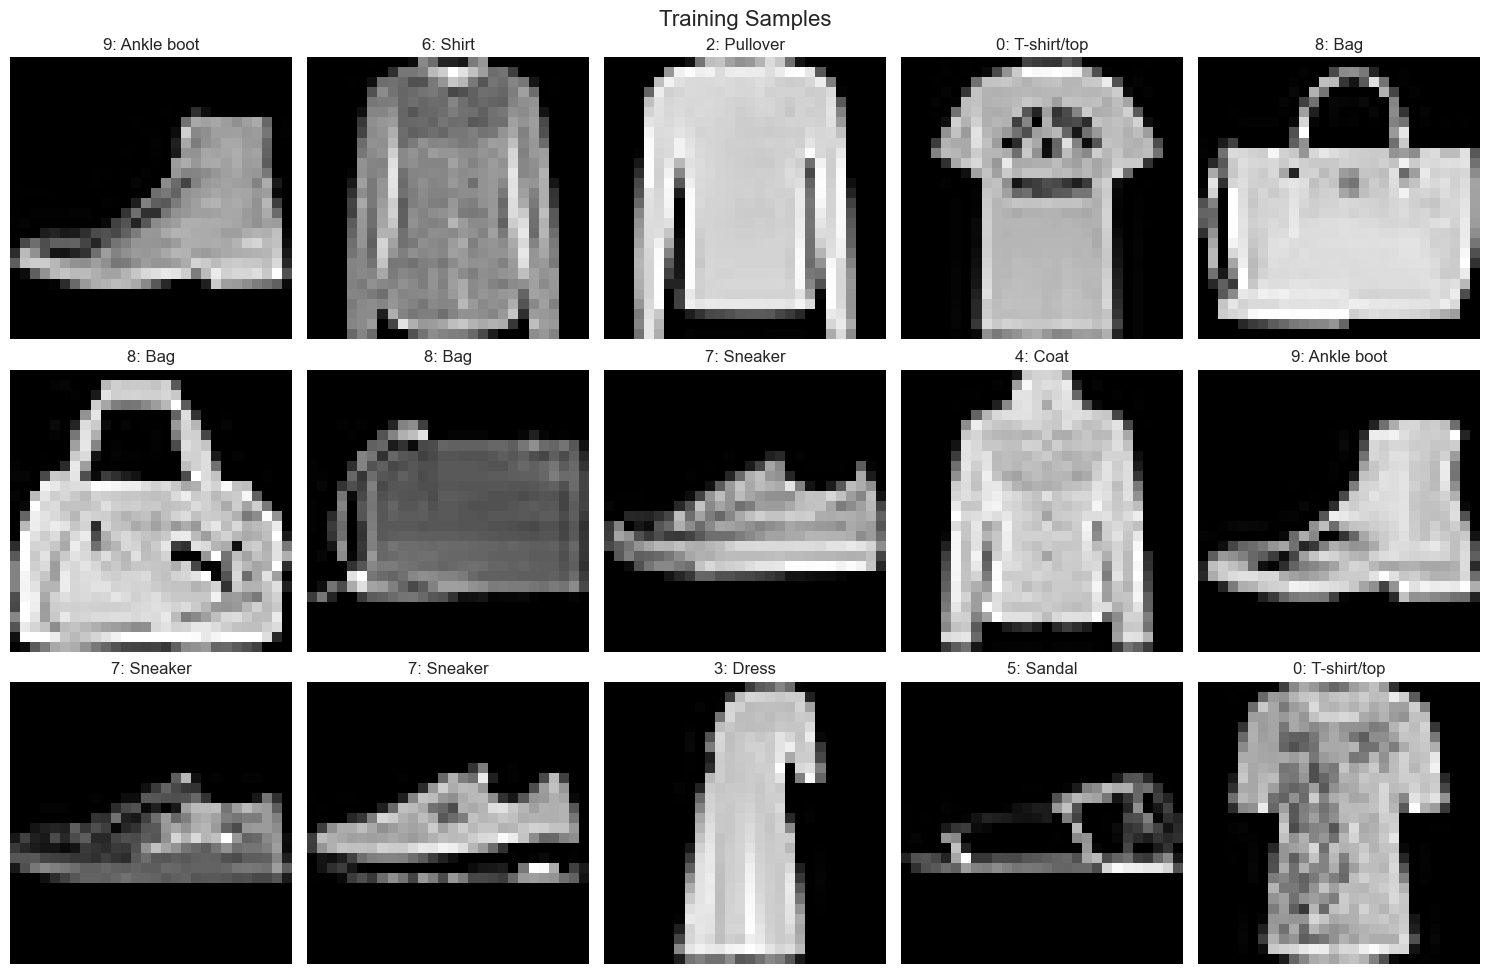

In [14]:
# Define class names for display
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Create figure
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.ravel()

# Display random samples
num_samples = 15
for i in range(num_samples):
    idx = random.randint(0, len(train_df)-1)
    image = train_df.iloc[idx, 1:].values.reshape(28, 28)
    label = int(train_df.iloc[idx, 0])
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"{label}: {class_names[label]}")
    axes[i].axis('off')

plt.suptitle("Training Samples", fontsize=16)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [15]:
# Convert to numpy arrays
training = np.array(train_df, dtype='float32')
testing = np.array(test_df, dtype='float32')

# Split into features and labels
X_train = training[:, 1:] / 255.0
y_train = training[:, 0]
X_test = testing[:, 1:] / 255.0
y_test = testing[:, 0]

# Split training into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Reshape for CNN input (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (48000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


### Model Building

In [16]:
# Build and compile a CNN model for Fashion MNIST classification
model = Sequential([
    # First convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

d:\Anish\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,682,954 (6.42 MB)

 Trainable params: 1,682,954 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [17]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.6719 - loss: 0.8954 - val_accuracy: 0.8593 - val_loss: 0.3828 - learning_rate: 0.0010
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.8495 - loss: 0.4150 - val_accuracy: 0.8787 - val_loss: 0.3281 - learning_rate: 0.0010
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - accuracy: 0.8723 - loss: 0.3519 - val_accuracy: 0.8886 - val_loss: 0.2973 - learning_rate: 0.0010
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.8886 - loss: 0.3170 - val_accuracy: 0.9018 - val_loss: 0.2675 - learning_rate: 0.0010
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - accuracy: 0.8934 - loss: 0.2944 - val_accuracy: 0.9049 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.8999 - loss: 0.2765 - val_accuracy: 0.9112 - val_loss: 0.2447 - learning_rate: 0.0010
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.9

### Model Evaluation


Test Accuracy: 0.9286
Test Loss: 0.1912
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


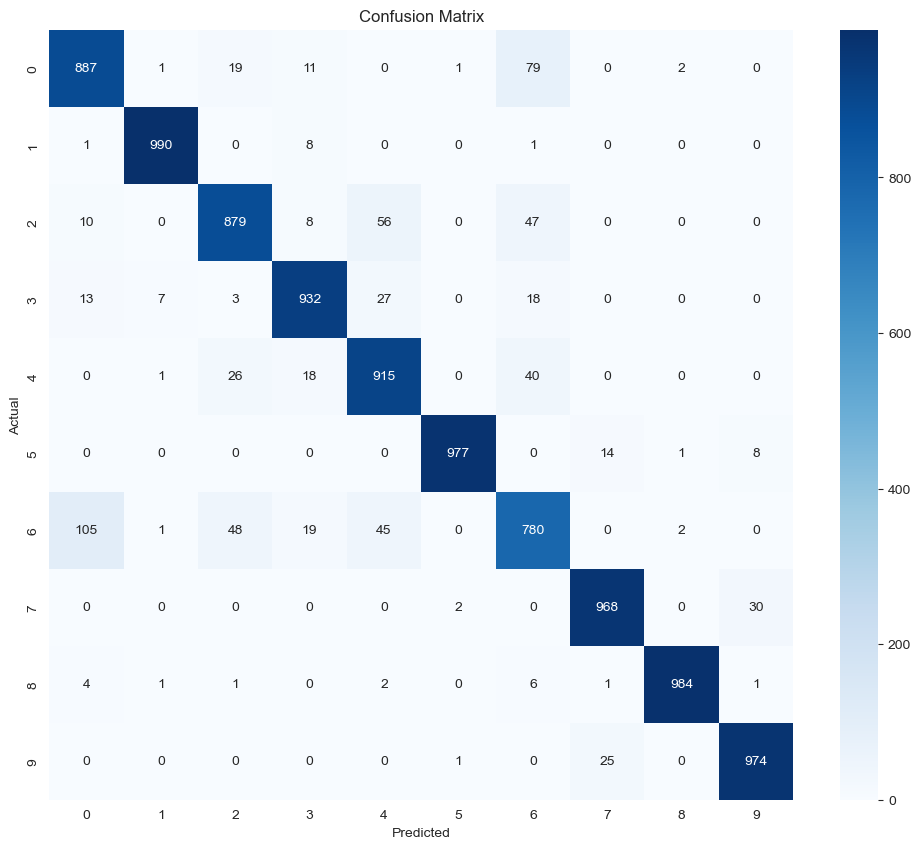


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.89      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.88      0.89      1000
       Dress       0.94      0.93      0.93      1000
        Coat       0.88      0.92      0.89      1000
      Sandal       1.00      0.98      0.99      1000
       Shirt       0.80      0.78      0.79      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [18]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

### Visual Predictions

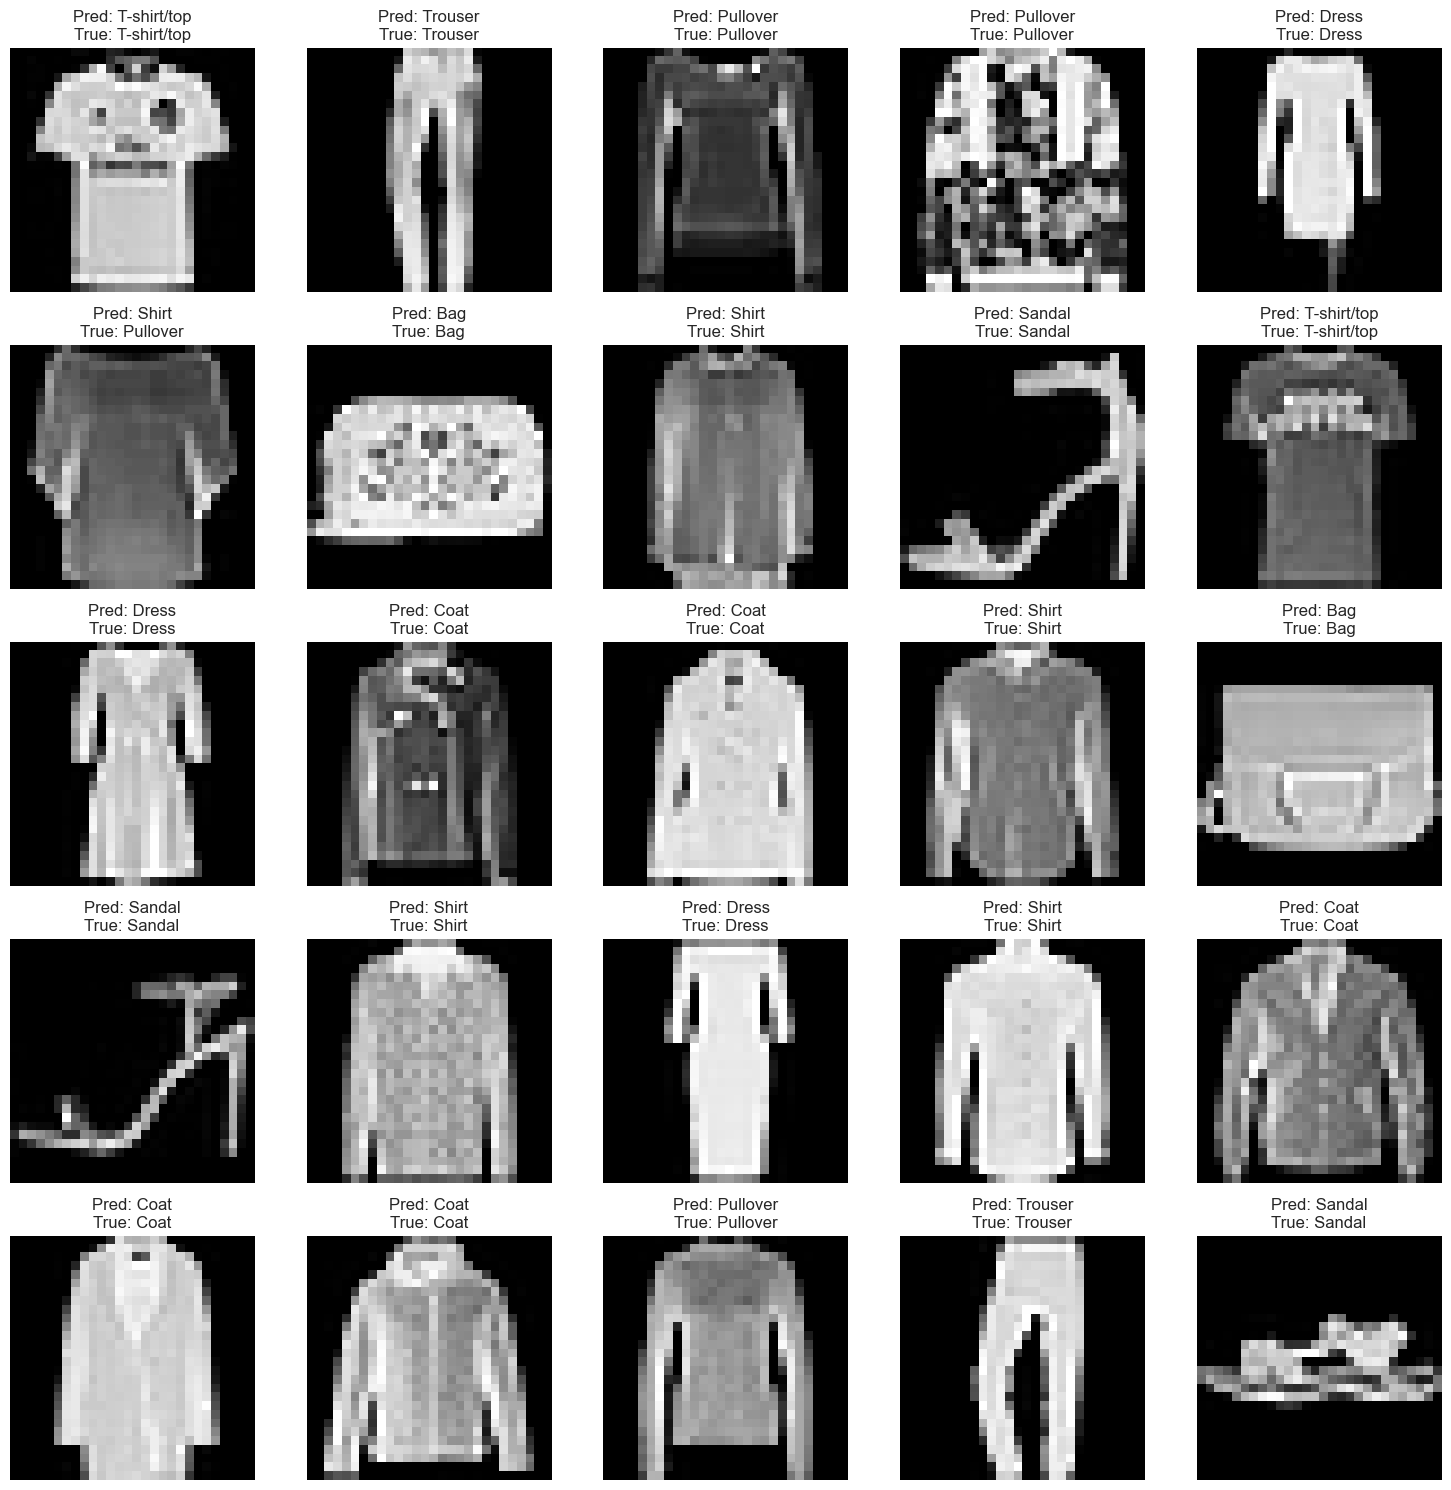

In [19]:
# Visualize model predictions with true labels
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(15, 15))
num_samples = 25
for i in range(num_samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[int(y_test[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()